Methods to apply Classification on Real numbered parameters, using complex coefficients.


To do:  
* Ramdomise parameters used in Random Search Algorithim  
* Create a Complex Manifold mapping Real plane to Complex plane
* Is Complex Variables better at 4 class problems (Not boolean)    
* Method to convert a Complex Number to a Boolean.  
    Maybe by converting to polar format.  


Promising results with Non-linearly seperable data.
Note:
- Optimise Gradient Descent
- Optimise Activation function (two variables mapping to one, losing information)
- Get circular Data

In [4]:
from linear_classification import \
    LinearClassification, ComplexLinearClassification
import math
import numpy as np
import random
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns
try:
    from jupyterthemes import jtplot
    jtplot.style()
except ImportError:
    print("jtplot not found, using default style")
plt.rcParams['figure.figsize'] = [12, 8]

## Get data

In [58]:
X, y = make_blobs(
    n_samples = 200,
    n_features = 3, 
    centers = 5)

In [59]:
y = y%2

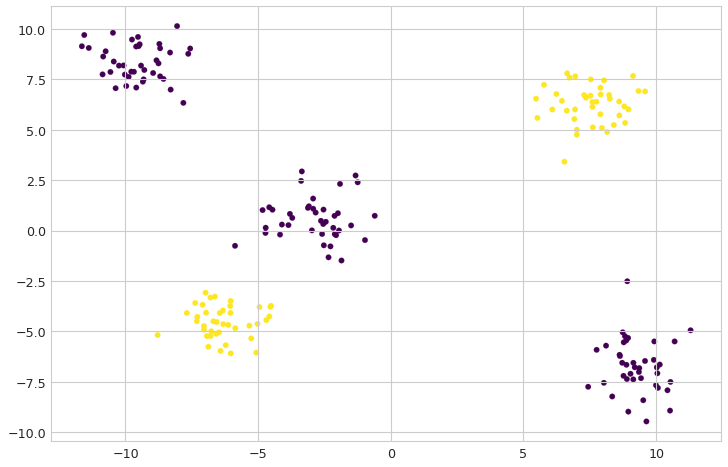

In [60]:
plt.scatter(x = X[:,0], y = X[:,1], c = y)

## Complex Valued Linear Classification

In [61]:
class ComplexLinearClassification():
    """
    Method to apply linear classification using complex coefficients.
    
    Activation function is sign(atan(z)).
    
    Using a manual Random Search Algorithim.
    
    """
    def __init__(
        self, 
        alpha = 1e-5,
        epoch = 1,
        tol = 1e-3,
        random_state = 0,
        n_iter = 10000,
        verbose = False,
        stochastic = False,
        p = 0.1
    ):
        """
        Initialising function.
        
        ::param alpha: (float) default = 1e-5
        ::param epoch: (int) default = 1
        ::param tol: (float) default = 1e-3
        ::random_state: (int) default = 0
        ::param n_iter: (int) default 10000
        ::param verbose: (boolean), default = False
        ::param stocastic: (boolean), default = True
        ::param p: (float), default = 0.1
        """
        self.alpha = alpha
        self.epoch = epoch
        self.tol = tol
        random.seed(random_state)
        self.loss = []
        self.weights_history = []
        self.n_iter = n_iter
        self.verbose = verbose
        self.weights = []
        self.stochastic = stochastic
        self.p = p

    def _print(self, *args):
        """
        Function to print, if verbose = True
        """
        if self.verbose:
            print(*args)


    def complex_weights(self, n):
        """
        Function get initial weights
        
        ::param n: (int)
        ::return: (numpy array[complex])
        """
        return np.array([
            random.randint(-10, 10) +
            random.randint(-10, 10)*1j
            for i in list(range(n))])

    def sigmoid(self, z):
        """
        Function to apply sigmoid function.
        
        ::param z: (complex)
        ::return: (boolean)
        """
        return 1/(1+np.exp(-1*z.real))
    
    def activation(self, z):
        """
        Function to convert a complex number to a boolean.
        
        ::param z: (complex)
        ::return: (boolean)
        """
        return True if z.real > 0 else False

    def error(self, y, y_pred):
        """
        Function to get error between y and prediction.
        
        ::param y: (numpy array)
        ::param y_pred: (numpy array)
        """
        return sum((y*1 - y_pred)**2)/len(y)

    def random_search_algorithim(self, X, y):
        """
        Random Search Algorithim for complex numbers polynomial.
        
        ::param X: (numpy ndarray)
        ::param y: (numpy array)
        ::param weights: (numpy array)
        """
        weights = self.weights
        
        dim = list(range(X.shape[1]))
        random.shuffle(dim)
        
        for i in dim:
            a = np.zeros((X.shape[1],)); 
            a[i] = 1
            
            temp_weights = weights + a*(0 + 0 * 1j)
            loss = self.error(y, self._predict(X, temp_weights))
            self._print(f"Initial Loss: {loss}")
            
            weights_alpha = [
                a*(0 + 1 * 1j) * self.alpha,
                a*(0 - 1 * 1j) * self.alpha,
                a*(1 + 0 * 1j) * self.alpha,
                a*(1 + 1 * 1j) * self.alpha,
                a*(1 - 1 * 1j) * self.alpha,
                a*(-1 + 0 * 1j) * self.alpha,
                a*(-1 + 1 * 1j) * self.alpha,
                a*(-1 - 1 * 1j) * self.alpha]
        
            for w in weights_alpha:
                if self.stochastic:
                    sample = np.random.choice(a=[False, True], size=(len(y), ), p=[1-self.p, self.p])
                else:
                    sample = [True]*len(y)
                if self.error(y[sample], self._predict(X[sample], temp_weights+w)) < loss:
                    temp_weights += w
                    self.weights_history += [temp_weights]
                    loss = self.error(y, self._predict(X, temp_weights))
                    self._print(f"Updated Loss: {loss}")
            
            self.loss += [loss]
            self.weights = temp_weights

    def fit(self, X, y):
        """
        Function to fit data to a complex linear function.
        
        ::param X: (numpy ndarray)
        ::param y: (numpy array)
        ::return: (complex)
        """
        X = np.c_[X, np.ones(len(X))]
        self.weights = self.complex_weights(X.shape[1])
        self._print("Initial weights: ", self.weights)
        
        for i in tqdm.tqdm(range(self.n_iter)):
            self.random_search_algorithim(X, y)

    def _predict(self, X, weights):
        """
        Function to fit data to a complex linear function.
        
        ::param X: (numpy ndarray)
        ::param training: (boolean)
        ::param weights: (numpy array)
        ::return: (complex)
        """
        return np.array([self.sigmoid(i) for i in X.dot(weights)])

    def predict(self, X):
        """
        Function to fit data to a complex linear function.
        
        ::param X: (numpy ndarray)
        ::param training: (boolean)
        ::param weights: (numpy array)
        ::return: (complex)
        """
        X = np.c_[X, np.ones(len(X))]
        weights = self.weights
        return np.array([self.activation(i) for i in X.dot(self.weights)])


In [62]:
clc = ComplexLinearClassification(alpha = 0.005, n_iter=2000, stochastic = False)

clc.fit(X, y)

100%|██████████| 2000/2000 [00:44<00:00, 44.85it/s]


In [63]:
print(f"Loss: {clc.loss[-1]}")
print(f"Percentage mapped correctly: {sum(y == clc.predict(X))/len(y)}")

Loss: 0.2515271246661898
Percentage mapped correctly: 0.75


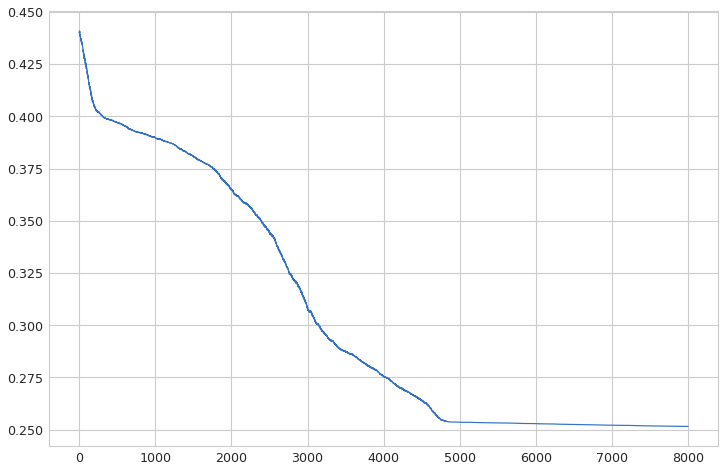

In [64]:
# Plot loss
plt.plot(clc.loss)

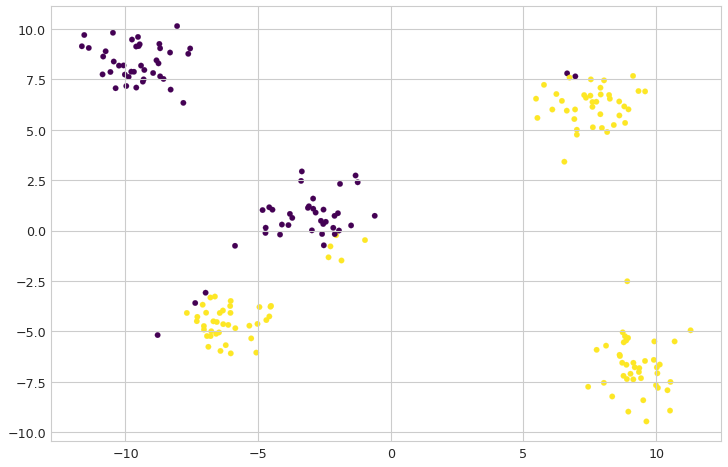

In [67]:
plt.scatter(x = X[:,0], y = X[:,1], c = clc.predict(X))

0 dimension path, with step count.


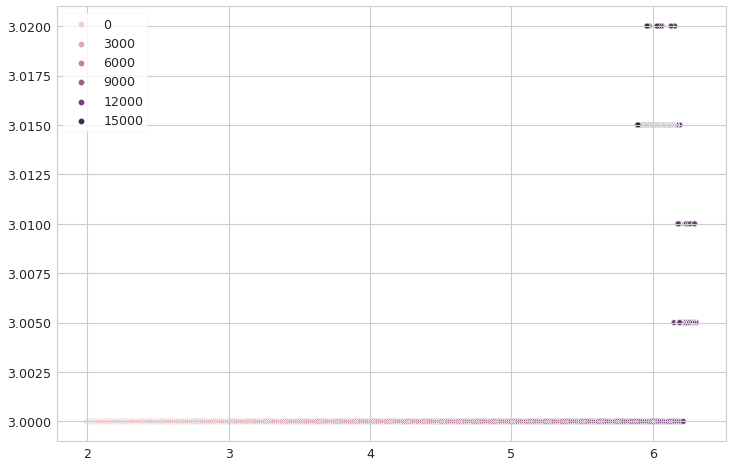


1 dimension path, with step count.


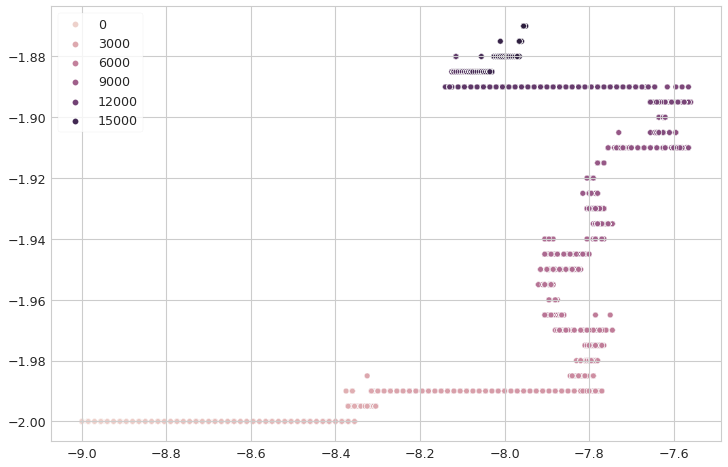


2 dimension path, with step count.


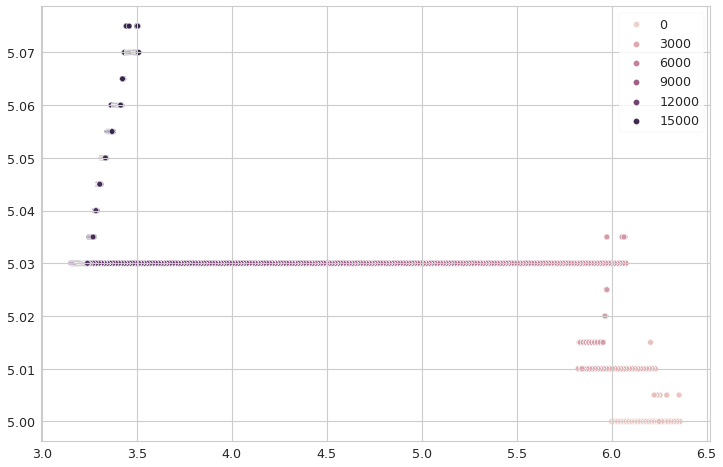


3 dimension path, with step count.


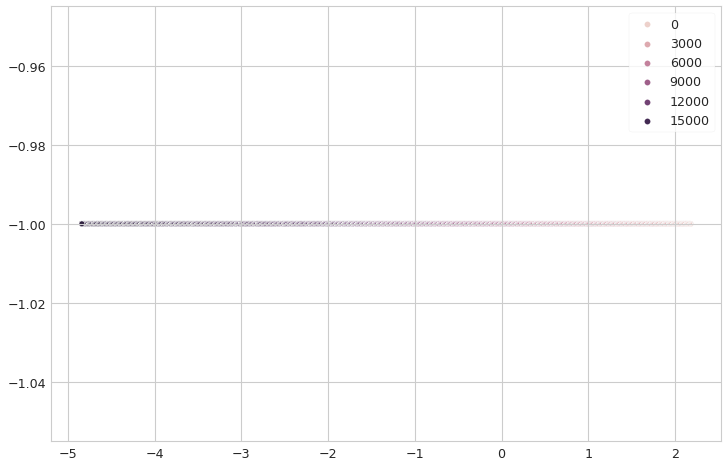

In [68]:
# Plot gradient path of variables
history = clc.weights_history
for j in range(history[0].shape[0]):
    print(f"{j} dimension path, with step count.")
    sns.scatterplot(x =[i[j].real for i in history], y =[i[j].imag for i in history], hue = range(len(history)))
    plt.show()
    print("")

## Real Valued Linear Classification

In [69]:
lc = LinearClassification(alpha = 0.005, n_iter=1000, stochastic = False)

lc.fit(X, y)

100%|██████████| 1000/1000 [00:07<00:00, 140.03it/s]


In [70]:
print(f"Loss: {lc.loss[-1]}")
print(f"Percentage mapped correctly: {sum(y == lc.predict(X))/len(y)}")

Loss: 0.6000000000000053
Percentage mapped correctly: 0.4


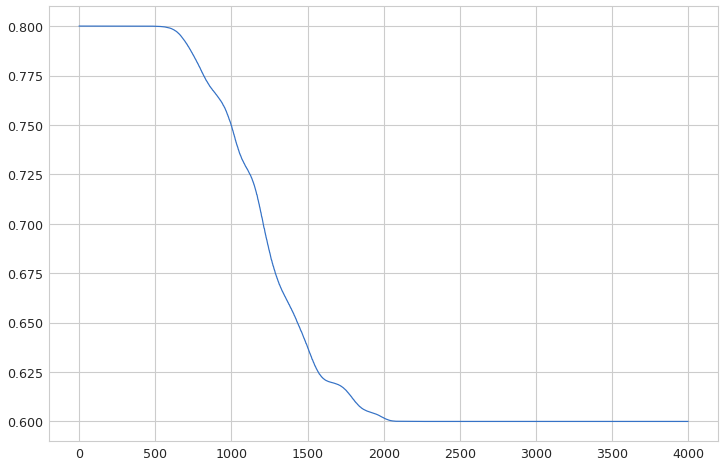

In [71]:
# Plot loss
plt.plot(lc.loss)

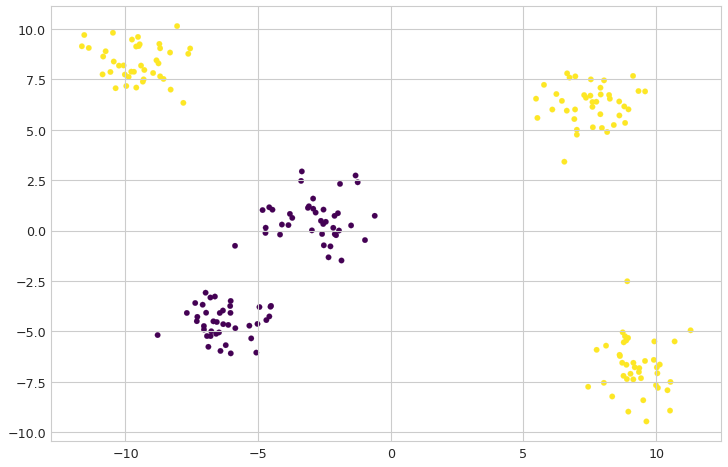

In [72]:
plt.scatter(x = X[:,0], y = X[:,1], c = lc.predict(X))

0 dimension path, with step count.


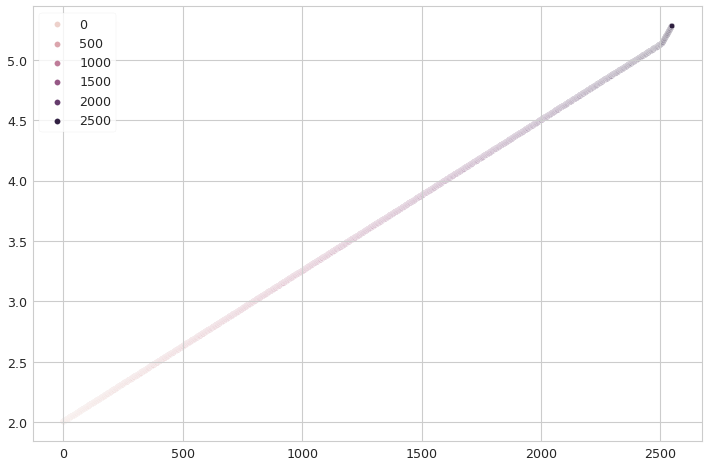


1 dimension path, with step count.


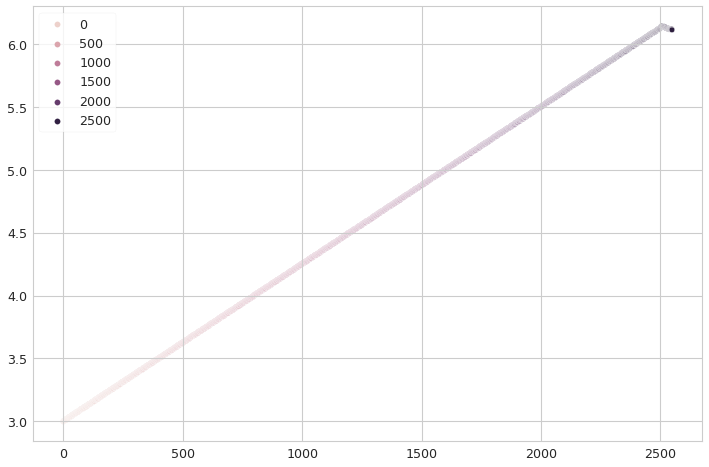


2 dimension path, with step count.


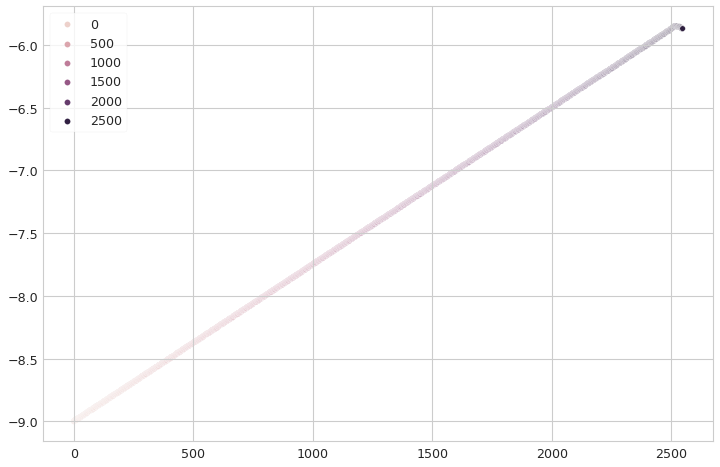


3 dimension path, with step count.


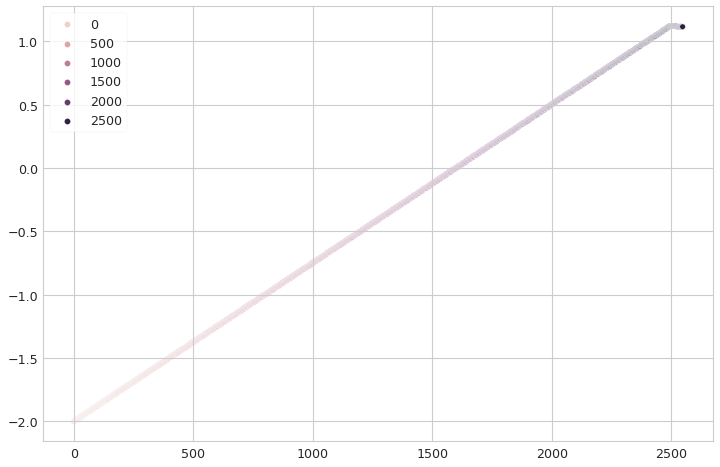

In [73]:
# Plot gradient path of variables
history = lc.weights_history
for j in range(history[0].shape[0]):
    print(f"{j} dimension path, with step count.")
    sns.scatterplot(x =range(len(history)), y =[i[j] for i in history], hue = range(len(history)))
    plt.show()
    print("")

## Sklearn Logestic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
log_r = LogisticRegression()

log_r.fit(X, y)

LogisticRegression()

In [76]:
print(f"Loss: {clc.loss[-1]}")
print(f"Percentage mapped correctly: {sum(y == log_r.predict(X))/len(y)}")

Loss: 0.2515271246661898
Percentage mapped correctly: 0.94


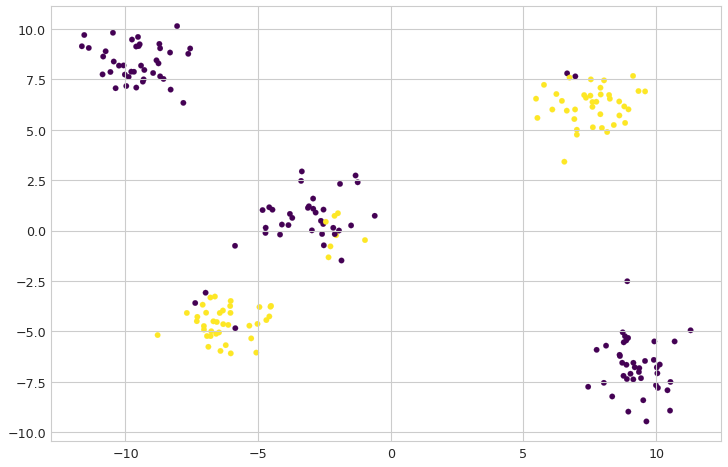

In [77]:
plt.scatter(x = X[:,0], y = X[:,1], c = log_r.predict(X))